In [3]:
import glob
files = glob.glob("lr/*.json")

In [4]:
files

['lr/dev_16.json', 'lr/dev_30.json', 'lr/dev_24.json', 'lr/dev_23.json']

In [3]:
import src.analyze as analyze
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os
import json
import tqdm
import math

# CORPUS_0_PATH = "src/words/dev_utt.txt"
month = 48
CORPUS_0_PATH = "corpora/000_dev.txt"
# with open("lr/bi_30.json","r") as file:
#     lr = json.load(file)
with open("lr/dev_30.json","r") as file:
    lr_dict = json.load(file)
    selected_words = [k for k, v in lr_dict.items()]

def zip_freq(original_file_path):
    """
    zip a file and delete the original one
    """
    original_file = original_file_path.split("/")[-1]
    filepath = "/".join(original_file_path.split("/")[:-1])
    # print(filepath)
    zipfile = original_file.replace(".json",".zip")

    os.chdir(filepath)
    ZipFile(zipfile, 'w').write(original_file)
    os.remove(original_file)
    os.chdir("../../")

def generate_file_name(i):
    """
    :@param: int index i 
    :@return: file name
    """
    if 0<i<10:
        return "corpora/bi/00"+str(i)+".json"
    elif 10<=i<100:
        return "corpora/bi/0"+str(i)+".json"
    elif 100<=i<1000:
        return "corpora/bi/"+str(i)+".json"

In [4]:
if not os.path.exists(CORPUS_0_PATH):
    print("Run extract_utterance.py first")
    exit(1)
else:
    with open(CORPUS_0_PATH, "r") as file:
        corpus_0 = file.read().split("\n")

corpus_0 = np.random.choice(corpus_0,len(corpus_0),replace=False)   # bi-lingual
with open(CORPUS_0_PATH,"w") as file:
    file.write("\n".join(corpus_0))

## get the freq dict 
word_freq = analyze.corpus_to_word_freq(corpus_0)
with open("corpora/bi/000.json", "w") as file:
    json.dump(word_freq,file,indent=4)
learned_words = analyze.learn_vocabulary_size(word_freq, lr_dict, selected_words)

# print(len(learned_words))

chi_dist = {0:len(learned_words)}

# pbar = tqdm.tqdm(total=3)
pbar = tqdm.tqdm(total=999)

i = 1
while i < 1000:
# while i<3:
    new_corpus_name = generate_file_name(i)

    if os.path.exists(new_corpus_name):
        with open(new_corpus_name,"r") as file:
            word_freq = json.load(file)
    else:
        new_corpus = analyze.sample_w_replacement(corpus_0, month)
        word_freq = analyze.corpus_to_word_freq(new_corpus)

        with open(new_corpus_name, "w") as file:
            json.dump(word_freq,file,indent=4)
        # zip_freq(new_corpus_name)

    selected_dict, learned_words = analyze.learn_vocabulary_size(word_freq, lr_dict, selected_words)
    with open(new_corpus_name, "w") as file:
            json.dump(selected_dict,file,indent=4)

    chi_dist[i] = len(learned_words)
    pbar.update(1)
    i += 1

with open("analysis/bi_child.json","w") as file:
    json.dump(chi_dist,file,indent=4)

100%|██████████| 999/999 [01:12<00:00, 14.07it/s]

In [5]:
## bilingual was done using terminal (python3 simulate.py)

In [9]:
with open("analysis/bi_child.json","r") as file:
    bi_child = json.load(file)
with open("analysis/dev_child.json","r") as file:
    dev_child = json.load(file)

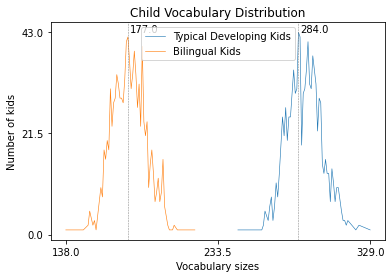

In [10]:
import src.analyze as analyze           
analyze.plot(dev_child, bi_child)

In [11]:
chi_dist

{0: 2,
 1: 172,
 2: 206,
 3: 195,
 4: 189,
 5: 168,
 6: 196,
 7: 181,
 8: 167,
 9: 184,
 10: 188,
 11: 179,
 12: 203,
 13: 189,
 14: 176,
 15: 159,
 16: 196,
 17: 183,
 18: 176,
 19: 184,
 20: 194,
 21: 166,
 22: 184,
 23: 162,
 24: 183,
 25: 186,
 26: 191,
 27: 187,
 28: 171,
 29: 183,
 30: 180,
 31: 178,
 32: 162,
 33: 183,
 34: 180,
 35: 181,
 36: 170,
 37: 178,
 38: 171,
 39: 163,
 40: 192,
 41: 156,
 42: 158,
 43: 175,
 44: 169,
 45: 184,
 46: 184,
 47: 195,
 48: 195,
 49: 194,
 50: 175,
 51: 161,
 52: 179,
 53: 178,
 54: 168,
 55: 193,
 56: 172,
 57: 183,
 58: 183,
 59: 181,
 60: 183,
 61: 185,
 62: 173,
 63: 177,
 64: 173,
 65: 178,
 66: 173,
 67: 171,
 68: 193,
 69: 188,
 70: 173,
 71: 186,
 72: 181,
 73: 183,
 74: 172,
 75: 172,
 76: 183,
 77: 174,
 78: 177,
 79: 165,
 80: 193,
 81: 155,
 82: 203,
 83: 192,
 84: 187,
 85: 168,
 86: 193,
 87: 171,
 88: 175,
 89: 177,
 90: 164,
 91: 166,
 92: 178,
 93: 176,
 94: 181,
 95: 181,
 96: 191,
 97: 168,
 98: 181,
 99: 167,
 100: 162,
 